## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9982872	total: 58.3ms	remaining: 58.3s
1:	learn: 0.9792620	total: 60ms	remaining: 29.9s
2:	learn: 0.9589960	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9425563	total: 62ms	remaining: 15.4s
4:	learn: 0.9246409	total: 63.2ms	remaining: 12.6s
5:	learn: 0.9074870	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8896179	total: 65ms	remaining: 9.22s
7:	learn: 0.8727474	total: 65.9ms	remaining: 8.17s
8:	learn: 0.8568289	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8403945	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8273210	total: 68.4ms	remaining: 6.15s
11:	learn: 0.8123799	total: 69.1ms	remaining: 5.69s
12:	learn: 0.7973183	total: 69.9ms	remaining: 5.3s
13:	learn: 0.7818191	total: 70.7ms	remaining: 4.98s
14:	learn: 0.7688868	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7546312	total: 72.2ms	remaining: 4.44s
16:	learn: 0.7428080	total: 73.7ms	remaining: 4.26s
17:	learn: 0.7302919	total: 75ms	remaining: 4.09s
18:	learn: 0.7176574	total: 75.8ms	remaining: 3.92s
1

60:	learn: 0.4184307	total: 109ms	remaining: 1.68s
61:	learn: 0.4141771	total: 110ms	remaining: 1.67s
62:	learn: 0.4117230	total: 111ms	remaining: 1.65s
63:	learn: 0.4081368	total: 112ms	remaining: 1.63s
64:	learn: 0.4051819	total: 113ms	remaining: 1.62s
65:	learn: 0.4023962	total: 113ms	remaining: 1.6s
66:	learn: 0.3996675	total: 115ms	remaining: 1.6s
67:	learn: 0.3959137	total: 116ms	remaining: 1.58s
68:	learn: 0.3928874	total: 116ms	remaining: 1.57s
69:	learn: 0.3905145	total: 117ms	remaining: 1.56s
70:	learn: 0.3866678	total: 118ms	remaining: 1.54s
71:	learn: 0.3834281	total: 119ms	remaining: 1.53s
72:	learn: 0.3803211	total: 120ms	remaining: 1.52s
73:	learn: 0.3768667	total: 121ms	remaining: 1.51s
74:	learn: 0.3736720	total: 121ms	remaining: 1.5s
75:	learn: 0.3710945	total: 122ms	remaining: 1.49s
76:	learn: 0.3674909	total: 123ms	remaining: 1.48s
77:	learn: 0.3638997	total: 124ms	remaining: 1.46s
78:	learn: 0.3616297	total: 125ms	remaining: 1.46s
79:	learn: 0.3592574	total: 126ms	

158:	learn: 0.2496372	total: 191ms	remaining: 1.01s
159:	learn: 0.2488313	total: 192ms	remaining: 1.01s
160:	learn: 0.2480194	total: 193ms	remaining: 1s
161:	learn: 0.2473750	total: 194ms	remaining: 1s
162:	learn: 0.2466690	total: 194ms	remaining: 999ms
163:	learn: 0.2461915	total: 195ms	remaining: 995ms
164:	learn: 0.2453781	total: 196ms	remaining: 992ms
165:	learn: 0.2447349	total: 197ms	remaining: 989ms
166:	learn: 0.2441540	total: 198ms	remaining: 986ms
167:	learn: 0.2433479	total: 198ms	remaining: 983ms
168:	learn: 0.2425361	total: 199ms	remaining: 980ms
169:	learn: 0.2419845	total: 200ms	remaining: 978ms
170:	learn: 0.2412713	total: 201ms	remaining: 974ms
171:	learn: 0.2402528	total: 202ms	remaining: 971ms
172:	learn: 0.2394382	total: 203ms	remaining: 969ms
173:	learn: 0.2389444	total: 203ms	remaining: 965ms
174:	learn: 0.2384246	total: 204ms	remaining: 963ms
175:	learn: 0.2378086	total: 205ms	remaining: 960ms
176:	learn: 0.2371880	total: 206ms	remaining: 958ms
177:	learn: 0.2362

289:	learn: 0.1767473	total: 299ms	remaining: 733ms
290:	learn: 0.1765195	total: 301ms	remaining: 732ms
291:	learn: 0.1763700	total: 302ms	remaining: 731ms
292:	learn: 0.1757422	total: 303ms	remaining: 730ms
293:	learn: 0.1753212	total: 303ms	remaining: 729ms
294:	learn: 0.1750976	total: 305ms	remaining: 728ms
295:	learn: 0.1748088	total: 306ms	remaining: 727ms
296:	learn: 0.1742969	total: 307ms	remaining: 726ms
297:	learn: 0.1738781	total: 307ms	remaining: 724ms
298:	learn: 0.1736492	total: 308ms	remaining: 723ms
299:	learn: 0.1733346	total: 309ms	remaining: 721ms
300:	learn: 0.1731212	total: 310ms	remaining: 719ms
301:	learn: 0.1729645	total: 310ms	remaining: 717ms
302:	learn: 0.1724992	total: 311ms	remaining: 715ms
303:	learn: 0.1720140	total: 312ms	remaining: 714ms
304:	learn: 0.1717839	total: 312ms	remaining: 712ms
305:	learn: 0.1714614	total: 313ms	remaining: 710ms
306:	learn: 0.1712598	total: 314ms	remaining: 708ms
307:	learn: 0.1708588	total: 314ms	remaining: 707ms
308:	learn: 

385:	learn: 0.1470720	total: 380ms	remaining: 605ms
386:	learn: 0.1469687	total: 381ms	remaining: 604ms
387:	learn: 0.1466246	total: 382ms	remaining: 603ms
388:	learn: 0.1463131	total: 383ms	remaining: 602ms
389:	learn: 0.1459705	total: 384ms	remaining: 600ms
390:	learn: 0.1456517	total: 385ms	remaining: 599ms
391:	learn: 0.1453550	total: 385ms	remaining: 598ms
392:	learn: 0.1450646	total: 386ms	remaining: 597ms
393:	learn: 0.1446368	total: 387ms	remaining: 595ms
394:	learn: 0.1443303	total: 388ms	remaining: 594ms
395:	learn: 0.1439982	total: 389ms	remaining: 593ms
396:	learn: 0.1437090	total: 390ms	remaining: 592ms
397:	learn: 0.1433162	total: 390ms	remaining: 590ms
398:	learn: 0.1430103	total: 391ms	remaining: 589ms
399:	learn: 0.1426218	total: 392ms	remaining: 588ms
400:	learn: 0.1421942	total: 393ms	remaining: 587ms
401:	learn: 0.1417549	total: 393ms	remaining: 585ms
402:	learn: 0.1415080	total: 394ms	remaining: 584ms
403:	learn: 0.1414014	total: 395ms	remaining: 583ms
404:	learn: 

515:	learn: 0.1175688	total: 490ms	remaining: 459ms
516:	learn: 0.1173263	total: 490ms	remaining: 458ms
517:	learn: 0.1171763	total: 491ms	remaining: 457ms
518:	learn: 0.1169435	total: 492ms	remaining: 456ms
519:	learn: 0.1166089	total: 493ms	remaining: 455ms
520:	learn: 0.1163020	total: 494ms	remaining: 454ms
521:	learn: 0.1159645	total: 494ms	remaining: 453ms
522:	learn: 0.1158978	total: 495ms	remaining: 452ms
523:	learn: 0.1156704	total: 496ms	remaining: 451ms
524:	learn: 0.1154739	total: 497ms	remaining: 450ms
525:	learn: 0.1151824	total: 498ms	remaining: 449ms
526:	learn: 0.1150036	total: 498ms	remaining: 447ms
527:	learn: 0.1148244	total: 499ms	remaining: 446ms
528:	learn: 0.1148077	total: 500ms	remaining: 445ms
529:	learn: 0.1147827	total: 501ms	remaining: 444ms
530:	learn: 0.1145763	total: 502ms	remaining: 443ms
531:	learn: 0.1143112	total: 503ms	remaining: 442ms
532:	learn: 0.1141373	total: 503ms	remaining: 441ms
533:	learn: 0.1140144	total: 504ms	remaining: 440ms
534:	learn: 

613:	learn: 0.1004835	total: 571ms	remaining: 359ms
614:	learn: 0.1004435	total: 572ms	remaining: 358ms
615:	learn: 0.1002458	total: 573ms	remaining: 357ms
616:	learn: 0.1001055	total: 573ms	remaining: 356ms
617:	learn: 0.0998690	total: 574ms	remaining: 355ms
618:	learn: 0.0996916	total: 575ms	remaining: 354ms
619:	learn: 0.0994613	total: 576ms	remaining: 353ms
620:	learn: 0.0993444	total: 576ms	remaining: 352ms
621:	learn: 0.0992556	total: 577ms	remaining: 351ms
622:	learn: 0.0990059	total: 578ms	remaining: 350ms
623:	learn: 0.0989544	total: 579ms	remaining: 349ms
624:	learn: 0.0988795	total: 580ms	remaining: 348ms
625:	learn: 0.0985965	total: 580ms	remaining: 347ms
626:	learn: 0.0984510	total: 581ms	remaining: 346ms
627:	learn: 0.0981922	total: 582ms	remaining: 345ms
628:	learn: 0.0979766	total: 583ms	remaining: 344ms
629:	learn: 0.0977969	total: 584ms	remaining: 343ms
630:	learn: 0.0976730	total: 584ms	remaining: 342ms
631:	learn: 0.0975571	total: 585ms	remaining: 341ms
632:	learn: 

746:	learn: 0.0826572	total: 680ms	remaining: 230ms
747:	learn: 0.0825028	total: 681ms	remaining: 230ms
748:	learn: 0.0823665	total: 682ms	remaining: 229ms
749:	learn: 0.0822169	total: 683ms	remaining: 228ms
750:	learn: 0.0821166	total: 684ms	remaining: 227ms
751:	learn: 0.0820306	total: 685ms	remaining: 226ms
752:	learn: 0.0819280	total: 685ms	remaining: 225ms
753:	learn: 0.0818834	total: 686ms	remaining: 224ms
754:	learn: 0.0817957	total: 687ms	remaining: 223ms
755:	learn: 0.0817460	total: 688ms	remaining: 222ms
756:	learn: 0.0815664	total: 689ms	remaining: 221ms
757:	learn: 0.0814987	total: 690ms	remaining: 220ms
758:	learn: 0.0813880	total: 690ms	remaining: 219ms
759:	learn: 0.0811963	total: 691ms	remaining: 218ms
760:	learn: 0.0811424	total: 692ms	remaining: 217ms
761:	learn: 0.0810037	total: 693ms	remaining: 216ms
762:	learn: 0.0809842	total: 694ms	remaining: 215ms
763:	learn: 0.0809178	total: 694ms	remaining: 215ms
764:	learn: 0.0807425	total: 695ms	remaining: 214ms
765:	learn: 

844:	learn: 0.0716835	total: 761ms	remaining: 140ms
845:	learn: 0.0716620	total: 762ms	remaining: 139ms
846:	learn: 0.0715849	total: 763ms	remaining: 138ms
847:	learn: 0.0715225	total: 764ms	remaining: 137ms
848:	learn: 0.0714337	total: 764ms	remaining: 136ms
849:	learn: 0.0713364	total: 765ms	remaining: 135ms
850:	learn: 0.0713168	total: 766ms	remaining: 134ms
851:	learn: 0.0712496	total: 767ms	remaining: 133ms
852:	learn: 0.0711490	total: 768ms	remaining: 132ms
853:	learn: 0.0710299	total: 768ms	remaining: 131ms
854:	learn: 0.0708873	total: 769ms	remaining: 130ms
855:	learn: 0.0707466	total: 770ms	remaining: 130ms
856:	learn: 0.0706347	total: 771ms	remaining: 129ms
857:	learn: 0.0706195	total: 772ms	remaining: 128ms
858:	learn: 0.0704763	total: 773ms	remaining: 127ms
859:	learn: 0.0704216	total: 773ms	remaining: 126ms
860:	learn: 0.0703283	total: 774ms	remaining: 125ms
861:	learn: 0.0702898	total: 775ms	remaining: 124ms
862:	learn: 0.0702301	total: 776ms	remaining: 123ms
863:	learn: 

972:	learn: 0.0610770	total: 871ms	remaining: 24.2ms
973:	learn: 0.0609861	total: 872ms	remaining: 23.3ms
974:	learn: 0.0609519	total: 873ms	remaining: 22.4ms
975:	learn: 0.0608256	total: 873ms	remaining: 21.5ms
976:	learn: 0.0607087	total: 874ms	remaining: 20.6ms
977:	learn: 0.0606126	total: 875ms	remaining: 19.7ms
978:	learn: 0.0604284	total: 876ms	remaining: 18.8ms
979:	learn: 0.0603144	total: 877ms	remaining: 17.9ms
980:	learn: 0.0602952	total: 878ms	remaining: 17ms
981:	learn: 0.0602483	total: 878ms	remaining: 16.1ms
982:	learn: 0.0602285	total: 879ms	remaining: 15.2ms
983:	learn: 0.0601014	total: 880ms	remaining: 14.3ms
984:	learn: 0.0600598	total: 881ms	remaining: 13.4ms
985:	learn: 0.0599625	total: 882ms	remaining: 12.5ms
986:	learn: 0.0599418	total: 882ms	remaining: 11.6ms
987:	learn: 0.0599157	total: 883ms	remaining: 10.7ms
988:	learn: 0.0598533	total: 884ms	remaining: 9.83ms
989:	learn: 0.0597283	total: 885ms	remaining: 8.94ms
990:	learn: 0.0595727	total: 886ms	remaining: 8.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

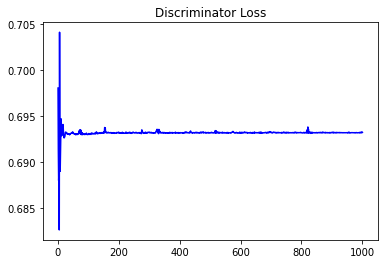

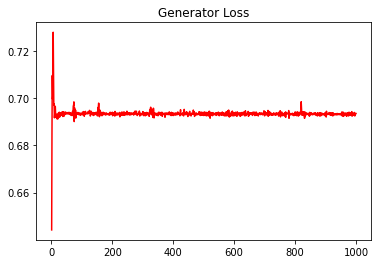

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13696753077182794


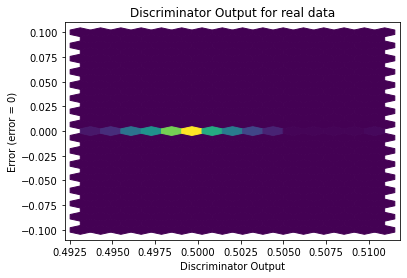

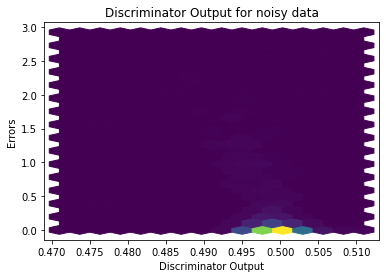

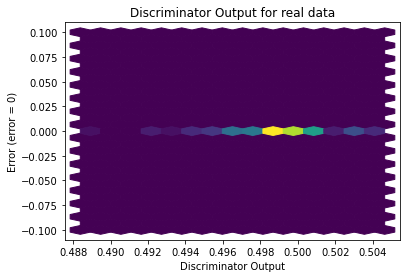

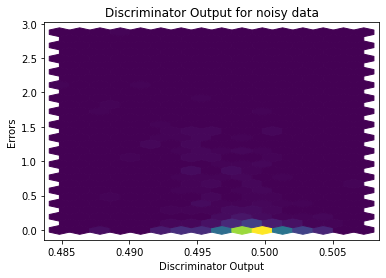

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


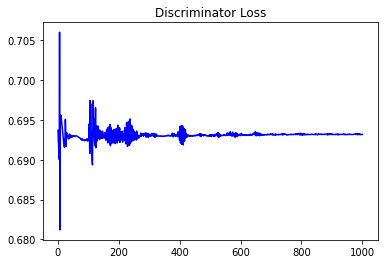

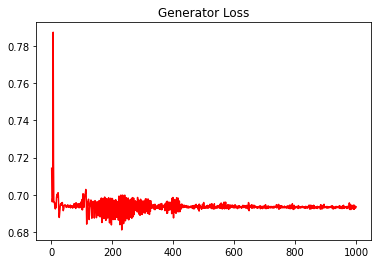

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11993436843284376


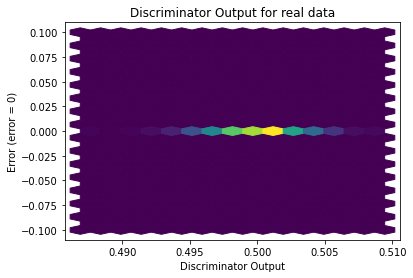

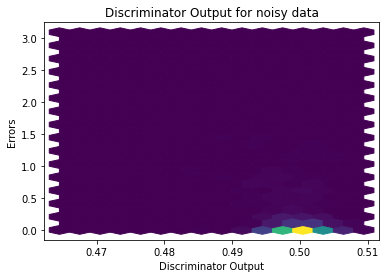

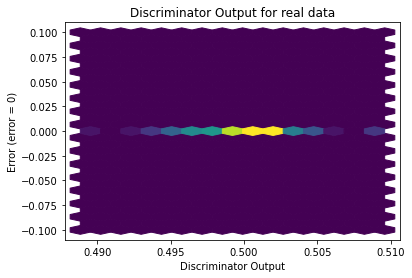

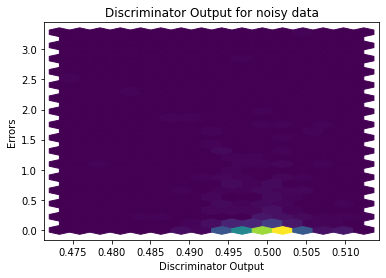

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0858]], requires_grad=True)
